In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
data=pd.read_excel('AirQualityUCI.xlsx')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
# replace -200 which represents null values

data=data.replace({-200:None})

# finding null values

data.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [4]:
# handling missing values

data=data.drop(['NMHC(GT)'],axis='columns')
data=data[pd.notnull(data['NO2(GT)'])]
for e in data.columns:
    if(data[e].isnull().sum()!=0):
        data[e]=data[e].fillna(data[e].mean())


In [5]:
# checking null values

data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [6]:
# taking description of dataset

data.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000
mean,2.205635,1111.994511,10.364336,950.533117,824.452117,1451.890944,1045.593388,17.962874,48.773557,0.994757
std,1.414443,213.679333,7.285752,259.847103,251.514474,346.049106,397.319524,8.811826,17.125681,0.395144
min,0.100000,647.250000,0.149048,383.250000,322.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.200000,955.500000,4.904878,758.625000,655.375000,1219.250000,760.500000,11.550000,35.750000,0.714983
50%,2.000000,1089.250000,9.004199,939.500000,801.500000,1451.890944,1013.250000,17.675000,48.773557,0.987521
75%,2.800000,1235.500000,14.096486,1119.750000,944.000000,1672.375000,1290.125000,23.750000,61.600000,1.254426
max,11.900000,2039.750000,63.741476,2214.000000,2682.750000,2775.000000,2522.750000,44.600000,88.725000,2.180639


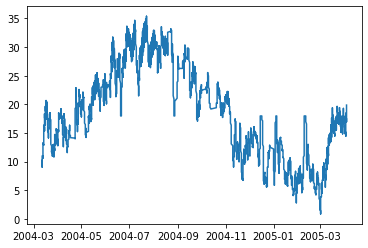

In [7]:
# plot of temperature vs time

plt.plot(data['Date'],data['T'].rolling(30).mean())

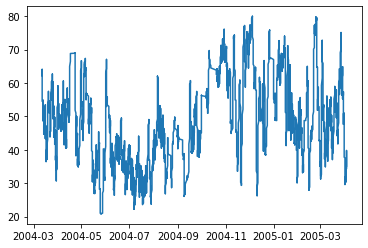

In [8]:
# plot of Relative humidity vs time

plt.plot(data['Date'],data['RH'].rolling(30).mean())

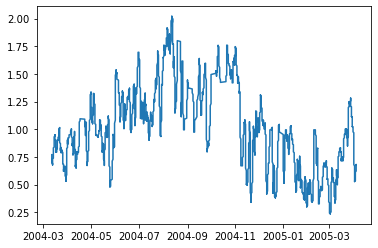

In [9]:
# plot of Absolute humidity vs time

plt.plot(data['Date'],data['AH'].rolling(30).mean())

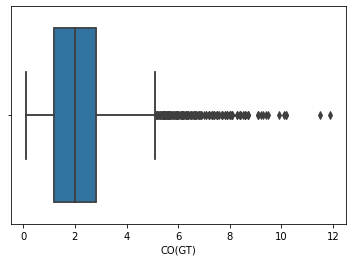

In [10]:
# removal of outliers

sns.boxplot(data['CO(GT)'])
data['CO(GT)']=np.where(data['CO(GT)']<-0.5,-0.5,data['CO(GT)'])
data['CO(GT)']=np.where(data['CO(GT)']>5.1,5.1,data['CO(GT)'])
sns.boxplot(data['CO(GT)'])


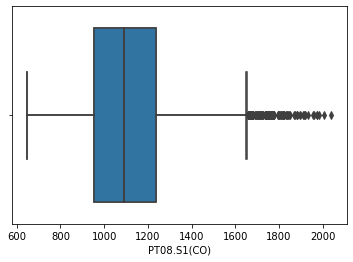

In [11]:
sns.boxplot(data['PT08.S1(CO)'])
data['PT08.S1(CO)']=np.where(data['PT08.S1(CO)']<641,641,data['PT08.S1(CO)'])
data['PT08.S1(CO)']=np.where(data['PT08.S1(CO)']>1650,1650,data['PT08.S1(CO)'])
sns.boxplot(data['PT08.S1(CO)'])

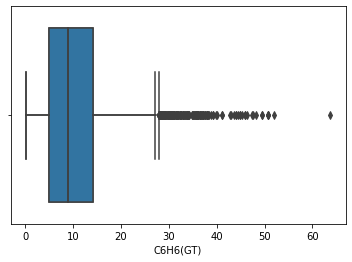

In [12]:
sns.boxplot(data['C6H6(GT)'])
data['C6H6(GT)']=np.where(data['C6H6(GT)']<-0.27,-0.27,data['C6H6(GT)'])
data['C6H6(GT)']=np.where(data['C6H6(GT)']>27.2,27.2,data['C6H6(GT)'])
sns.boxplot(data['C6H6(GT)'])


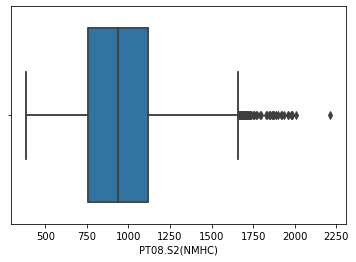

In [13]:
sns.boxplot(data['PT08.S2(NMHC)'])
data['PT08.S2(NMHC)']=np.where(data['PT08.S2(NMHC)']<375,375,data['PT08.S2(NMHC)'])
data['PT08.S2(NMHC)']=np.where(data['PT08.S2(NMHC)']>1660,1660,data['PT08.S2(NMHC)'])
sns.boxplot(data['PT08.S2(NMHC)'])

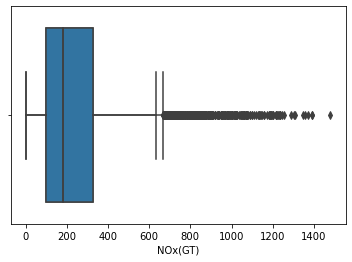

In [14]:
sns.boxplot(data['NOx(GT)'])
data['NOx(GT)']=np.where(data['NOx(GT)']>632,632,data['NOx(GT)'])
sns.boxplot(data['NOx(GT)'])


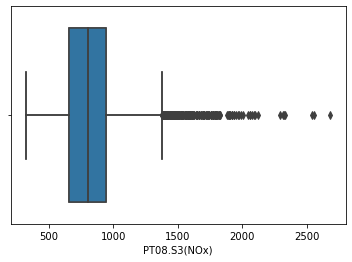

In [15]:
sns.boxplot(data['PT08.S3(NOx)'])
data['PT08.S3(NOx)']=np.where(data['PT08.S3(NOx)']<314,314,data['PT08.S3(NOx)'])
data['PT08.S3(NOx)']=np.where(data['PT08.S3(NOx)']>1375,1375,data['PT08.S3(NOx)'])
sns.boxplot(data['PT08.S3(NOx)'])


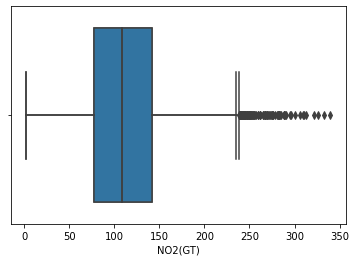

In [16]:

sns.boxplot(data['NO2(GT)'])
data['NO2(GT)']=np.where(data['NO2(GT)']<0.4,0.4,data['NO2(GT)'])
data['NO2(GT)']=np.where(data['NO2(GT)']>235,235,data['NO2(GT)'])
sns.boxplot(data['NO2(GT)'])


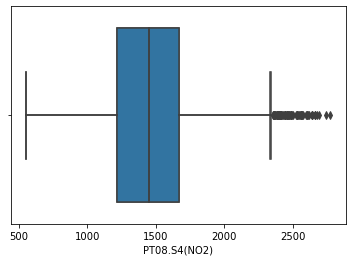

In [17]:
sns.boxplot(data['PT08.S4(NO2)'])
data['PT08.S4(NO2)']=np.where(data['PT08.S4(NO2)']<541,541,data['PT08.S4(NO2)'])
data['PT08.S4(NO2)']=np.where(data['PT08.S4(NO2)']>2335,2335,data['PT08.S4(NO2)'])
sns.boxplot(data['PT08.S4(NO2)'])

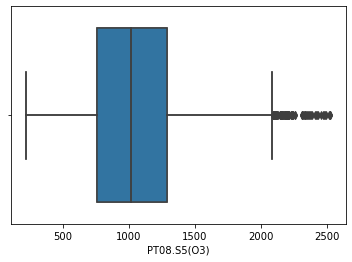

In [18]:
sns.boxplot(data['PT08.S5(O3)'])
data['PT08.S5(O3)']=np.where(data['PT08.S5(O3)']<213,213,data['PT08.S5(O3)'])
data['PT08.S5(O3)']=np.where(data['PT08.S5(O3)']>2080,2080,data['PT08.S5(O3)'])
sns.boxplot(data['PT08.S5(O3)'])


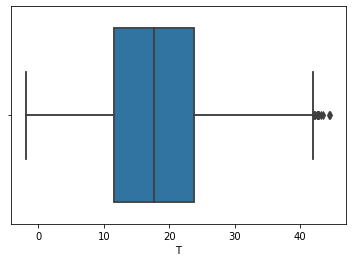

In [19]:
sns.boxplot(data['T'])
data['T']=np.where(data['T']<-2.2,-2.2,data['T'])
data['T']=np.where(data['T']>42,42,data['T'])
sns.boxplot(data['T'])


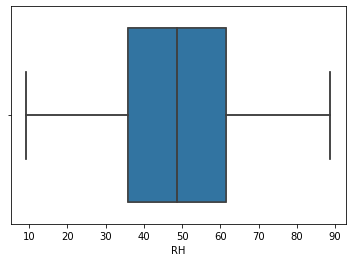

In [20]:
sns.boxplot(data['RH'])
data['RH']=np.where(data['RH']<8.3,8.3,data['RH'])
sns.boxplot(data['RH'])

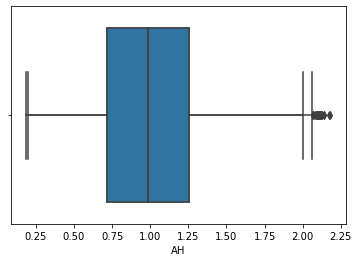

In [21]:
sns.boxplot(data['AH'])
data['AH']=np.where(data['AH']<0.2,0.2,data['AH'])
data['AH']=np.where(data['AH']>2,2,data['AH'])
sns.boxplot(data['AH'])


In [22]:
data.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000
mean,2.153425,1110.159881,10.184518,949.496176,817.085051,1450.293461,1043.766406,17.961302,48.773557,0.994298
std,1.255275,208.192739,6.699530,256.545730,227.446252,341.415467,391.939113,8.807399,17.125681,0.393891
min,0.100000,647.250000,0.149048,383.250000,322.000000,551.000000,221.000000,-1.900000,9.175000,0.200000
25%,1.200000,955.500000,4.904878,758.625000,655.375000,1219.250000,760.500000,11.550000,35.750000,0.714983
50%,2.000000,1089.250000,9.004199,939.500000,801.500000,1451.890944,1013.250000,17.675000,48.773557,0.987521
75%,2.800000,1235.500000,14.096486,1119.750000,944.000000,1672.375000,1290.125000,23.750000,61.600000,1.254426
max,5.100000,1650.000000,27.200000,1660.000000,1375.000000,2335.000000,2080.000000,42.000000,88.725000,2.000000


In [23]:
# finding correlation matrix which helps in finding the relationship between target variable and predictors

data.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.829164,0.878366,0.863641,-0.707616,0.590840,0.812521,0.028462,0.048288,0.056666
PT08.S1(CO),0.829164,1.000000,0.883488,0.887214,-0.807206,0.665397,0.898899,0.039615,0.150216,0.148184
C6H6(GT),0.878366,0.883488,1.000000,0.988645,-0.787750,0.761860,0.870638,0.217915,-0.055631,0.191125
PT08.S2(NMHC),0.863641,0.887214,0.988645,1.000000,-0.823125,0.771126,0.877859,0.247514,-0.072308,0.208528
PT08.S3(NOx),-0.707616,-0.807206,-0.787750,-0.823125,1.000000,-0.533050,-0.831945,-0.114146,-0.099672,-0.227510
PT08.S4(NO2),0.590840,0.665397,0.761860,0.771126,-0.533050,1.000000,0.575076,0.581928,-0.029488,0.657022
PT08.S5(O3),0.812521,0.898899,0.870638,0.877859,-0.831945,0.575076,1.000000,-0.031785,0.148290,0.080408
T,0.028462,0.039615,0.217915,0.247514,-0.114146,0.581928,-0.031785,1.000000,-0.574733,0.662421
RH,0.048288,0.150216,-0.055631,-0.072308,-0.099672,-0.029488,0.148290,-0.574733,1.000000,0.165169
AH,0.056666,0.148184,0.191125,0.208528,-0.227510,0.657022,0.080408,0.662421,0.165169,1.000000


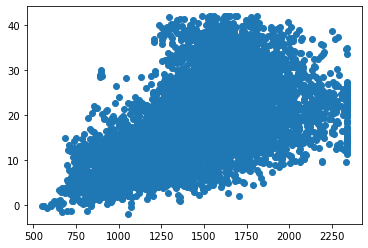

In [25]:
plt.scatter(data['PT08.S4(NO2)'],data['T'])

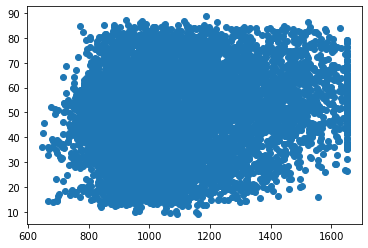

In [26]:
plt.scatter(data['PT08.S1(CO)'],data['RH'])

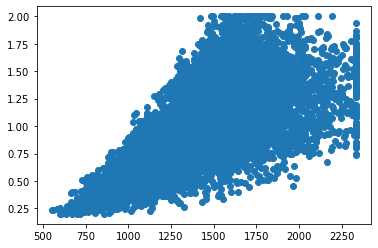

In [27]:
plt.scatter(data['PT08.S4(NO2)'],data['AH'])

In [28]:
# finding the index position of features in the dataset

for e in enumerate(data.columns):
    print(e)

(0, 'Date')
(1, 'Time')
(2, 'CO(GT)')
(3, 'PT08.S1(CO)')
(4, 'C6H6(GT)')
(5, 'PT08.S2(NMHC)')
(6, 'NOx(GT)')
(7, 'PT08.S3(NOx)')
(8, 'NO2(GT)')
(9, 'PT08.S4(NO2)')
(10, 'PT08.S5(O3)')
(11, 'T')
(12, 'RH')
(13, 'AH')


In [31]:
# diving dataset into predictors and target variables

X=data.iloc[:,2:11].values
y_temp=data.iloc[:,11].values
y_RH=data.iloc[:,12].values
y_AH=data.iloc[:,13].values


array([13.5999999 , 13.29999995, 11.9000001 , ..., 26.89999962,
       28.32499981, 28.50000048])

In [32]:
# performing feature scaling

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(X)
X

array([[ 0.3557816 ,  1.2001202 ,  0.25334843, ...,  0.00659643,
         0.70800016,  0.57087463],
       [-0.12223227,  0.8746795 , -0.11753128, ..., -0.43851851,
         0.31768792, -0.18247998],
       [ 0.03710568,  1.40186942, -0.17714351, ...,  0.02779238,
         0.30523893,  0.0771435 ],
       ...,
       [ 0.19644364,  0.15294569,  0.32691283, ...,  1.31438653,
        -0.61378895,  0.12307197],
       [-0.0425633 , -0.51714992, -0.09513695, ...,  0.91166348,
        -1.19889117, -0.69917535],
       [ 0.03710568, -0.18930744,  0.26086235, ...,  1.16601488,
        -0.94258857, -0.58116468]])

In [179]:
# finding the feature importance

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

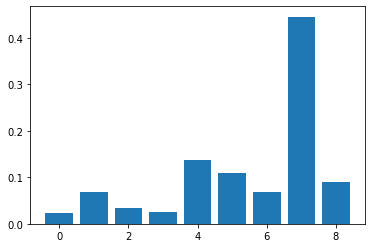

In [180]:
#this is for temprature

dt.fit(X,y_temp)
importance=dt.feature_importances_
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# 4,5,8,7

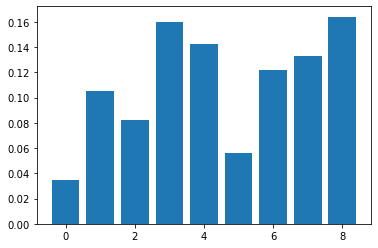

In [181]:
#this is for relative humidity

dt.fit(X,y_RH)
importance=dt.feature_importances_
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# 1,2,3,4,6,7,8

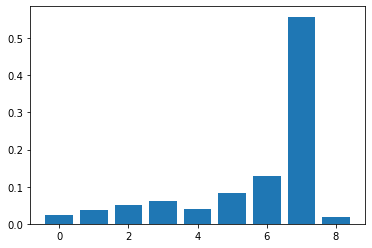

In [182]:
#this is for absolute humidity

dt.fit(X,y_AH)
importance=dt.feature_importances_
plt.bar([x for x in range(len(importance))],importance)
plt.show()

# 3,5,6,7

In [33]:
# dividing dataset into train and test sets
# building model and fitting of data 

# this is for temperature

from sklearn.model_selection import train_test_split
X_train,X_test,y_temp_train,y_temp_test=train_test_split(X,y_temp,test_size=0.15,random_state=30)

from sklearn.ensemble import RandomForestRegressor
model_temp=RandomForestRegressor()
model_temp.fit(X_train,y_temp_train)

RandomForestRegressor()

In [35]:
print(f'Train set acccuracy : {model_temp.score(X_train,y_temp_train)}\nTest set accuracy : {model_temp.score(X_test,y_temp_test)}')

Train set acccuracy : 0.9776800172380248
Test set accuracy : 0.8564772308492176


In [36]:
# dividing dataset into train and test sets
# building model and fitting of data

# this is for RH

from sklearn.model_selection import train_test_split
X_train,X_test,y_RH_train,y_RH_test=train_test_split(X,y_RH,test_size=0.15,random_state=30)

from sklearn.ensemble import RandomForestRegressor
model_RH=RandomForestRegressor()
model_RH.fit(X_train,y_RH_train)

RandomForestRegressor()

In [37]:
print(f'Train set acccuracy : {model_RH.score(X_train,y_RH_train)}\nTest set accuracy : {model_RH.score(X_test,y_RH_test)}')

Train set acccuracy : 0.9613885440756971
Test set accuracy : 0.7526197754707884


In [38]:
# dividing dataset into train and test sets
# building model and fitting of data

# this is for AH

from sklearn.model_selection import train_test_split
X_train,X_test,y_AH_train,y_AH_test=train_test_split(X,y_AH,test_size=0.15,random_state=30)

from sklearn.ensemble import RandomForestRegressor
model_AH=RandomForestRegressor()
model_AH.fit(X_train,y_AH_train)

RandomForestRegressor()

In [39]:
print(f'Train set acccuracy : {model_AH.score(X_train,y_AH_train)}\nTest set accuracy : {model_AH.score(X_test,y_AH_test)}')

Train set acccuracy : 0.9900700651433264
Test set accuracy : 0.931368604156687


In [40]:
# taking prediction from test set

y_temp_pred=model_temp.predict(X_test)
y_temp_pred

array([21.38400001, 19.2620834 ,  8.16725003, ..., 34.80533337,
       18.59241661, 32.50458328])

In [41]:
y_temp_test

array([25.5       , 18.89999962,  9.12499976, ..., 33.57499886,
       12.875     , 34.57500029])

In [42]:
# taking feature values from user and finding the prediction
i=0
l=[]
while(i<9):
    a=float(input(f'Enter the value of {data.columns[i+2]} : '))
    l.append(a)
    i+=1
user_value=np.array([l])
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
user_value=std.fit_transform(user_value)
pred_temp=model_temp.predict(user_value)
pred_RH=model_RH.predict(user_value)
pred_AH=model_AH.predict(user_value)
print('Temperature : ',pred_temp)
print('Relative Humidity : ',pred_RH)
print('Absolute Humidity : ',pred_AH)

Enter the value of CO(GT) : 2.6
Enter the value of PT08.S1(CO) : 1360
Enter the value of C6H6(GT) : 11.88
Enter the value of PT08.S2(NMHC) : 1045
Enter the value of NOx(GT) : 166
Enter the value of PT08.S3(NOx) : 1056
Enter the value of NO2(GT) : 113
Enter the value of PT08.S4(NO2) : 1692
Enter the value of PT08.S5(O3) : 1267
Temperature :  [17.96470813]
Relative Humidity :  [48.30080893]
Absolute Humidity :  [1.02407732]
